# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/telecom_churn.csv')

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges Churn  
0           Electronic check       $29.85/m       $29.85    No  
1               Mailed check       $56.95/m      $1889.5    No  
2               Mailed check       $53.85/m      $108.15   Yes  
3  Bank transfer (automatic)        $42.3/m     $1840.75    No  
4           Electronic check        $70.7/m      $151.65   Yes  

[5 rows x 21 columns]

## Data Inspection

In [68]:
df.describe(include = 'all')
df.info()
df.isnull().sum()

# Get no. of values of Yes and No instances in Churn column
print("# of Yes Churn:" , df['Churn'].value_counts()['Yes'])
print("# of No Churn:" , df['Churn'].value_counts()['No'])

# No. of records in data frame
df.shape[0]

# Unique Values
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")
# No. of unique values
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")   

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   object  
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     6352 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    5512 non-null   object  
 9   OnlineBackup      5512 non-null   object  
 10  DeviceProtection  5512 non-null   object  
 11  TechSupport       5512 non-null   object  
 12  StreamingTV       5512 non-null   object  
 13  StreamingMovies   5512 non-null   object  
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod 

## Data Cleaning

In [69]:
# Set Customer ID as the Index for Data Frame, with auto assign to null ID values.
df = df.set_index('customerID')

# Drop Total Charges Column; Does not add useful information and has almost unique values for all entries.
df.drop(['TotalCharges'], axis="columns", inplace=True)

# Cleaning Numerical Values and Adjusting Data Type

df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('$','')
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace("/m",'')
df['MonthlyCharges'] = df['MonthlyCharges'].astype(float)

df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)
df['SeniorCitizen'] = df['SeniorCitizen'].str.replace('1', 'Yes')
df['SeniorCitizen'] = df['SeniorCitizen'].str.replace('0', 'No')

'''
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['OnlineBackup'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['DeviceProtection'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['TechSupport'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['StreamingTV'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['StreamingMovies'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['MultipleLines'] = df['OnlineSecurity'].str.replace('No internet service','No')
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace('No internet service','No')
'''

# Transform value 'No internet service' to NULL for better modelling
df['OnlineSecurity'] = df['OnlineSecurity'].replace(['No internet service'], np.nan)
df['OnlineBackup'] = df['OnlineBackup'].replace(['No internet service'], np.nan)
df['DeviceProtection'] = df['DeviceProtection'].replace(['No internet service'], np.nan)
df['TechSupport'] = df['TechSupport'].replace(['No internet service'], np.nan)
df['StreamingTV'] = df['StreamingTV'].replace(['No internet service'], np.nan)
df['StreamingMovies'] = df['StreamingMovies'].replace(['No internet service'], np.nan)

# Transform value 'No phone service' to NULL for better modelling
df['MultipleLines'] = df['MultipleLines'].replace(['No phone service'], np.nan)

# Specifying Ordinal Column in Dataframe 
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)


# Encoding Categorical Values

#One-hot encoding for categorical columns
categorical_columns = ['gender', 'SeniorCitizen', 'Partner','Dependents', 'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling']
df_enc= pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

df_enc['Churn'] = df_enc['Churn'].astype('category').cat.codes

categorical_columns_2ormore = ['InternetService', 'PaymentMethod']
df_enc= pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=False,
                           dtype='int8')

df_enc.head()

#Label encoding for categorical values with more that two unique values
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_enc['InternetService']= label_encoder.fit_transform(df_enc['InternetService'])
df_enc['PaymentMethod']= label_encoder.fit_transform(df_enc['PaymentMethod'])
df_enc['Contract']= label_encoder.fit_transform(df_enc['Contract'])

df_enc.head()

tenure  MonthlyCharges Churn  gender_Female  gender_Male  \
customerID                                                             
7590-VHVEG       1           29.85    No              1            0   
5575-GNVDE      34           56.95    No              0            1   
3668-QPYBK       2           53.85   Yes              0            1   
7795-CFOCW      45           42.30    No              0            1   
9237-HQITU       2           70.70   Yes              1            0   

            SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
customerID                                                                 
7590-VHVEG                 1                  0           0            1   
5575-GNVDE                 1                  0           1            0   
3668-QPYBK                 1                  0           1            0   
7795-CFOCW                 1                  0           1            0   
9237-HQITU                 1                  0           1            0   

            Dependents_No  ...  Contract_Month-to-month  Contract_One year  \
customerID                 ...                                               
7590-VHVEG              1  ...                        1                  0   
5575-GNVDE              1  ...                        0                  1   
3668-QPYBK              1  ...                        1                  0   
7795-CFOCW              1  ...                        0                  1   
9237-HQITU              1  ...                        1                  0   

            Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
customerID                                                               
7590-VHVEG                  0                                        0   
5575-GNVDE                  0                                        0   
3668-QPYBK                  0                                        0   
7795-CFOCW                  0                                        1   
9237-HQITU                  0                                        0   

            PaymentMethod_Credit card (automatic)  \
customerID                                          
7590-VHVEG                                      0   
5575-GNVDE                                      0   
3668-QPYBK                                      0   
7795-CFOCW                                      0   
9237-HQITU                                      0   

            PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
customerID                                                               
7590-VHVEG                               1                           0   
5575-GNVDE                               0                           1   
3668-QPYBK                               0                           1   
7795-CFOCW                               0                           0   
9237-HQITU                               1                           0   

            InternetService_DSL  InternetService_Fiber optic  \
customerID                                                     
7590-VHVEG                    1                            0   
5575-GNVDE                    1                            0   
3668-QPYBK                    1                            0   
7795-CFOCW                    1                            0   
9237-HQITU                    0                            1   

            InternetService_No  
customerID                      
7590-VHVEG                   0  
5575-GNVDE                   0  
3668-QPYBK                   0  
7795-CFOCW                   0  
9237-HQITU                   0  

[5 rows x 39 columns]

## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

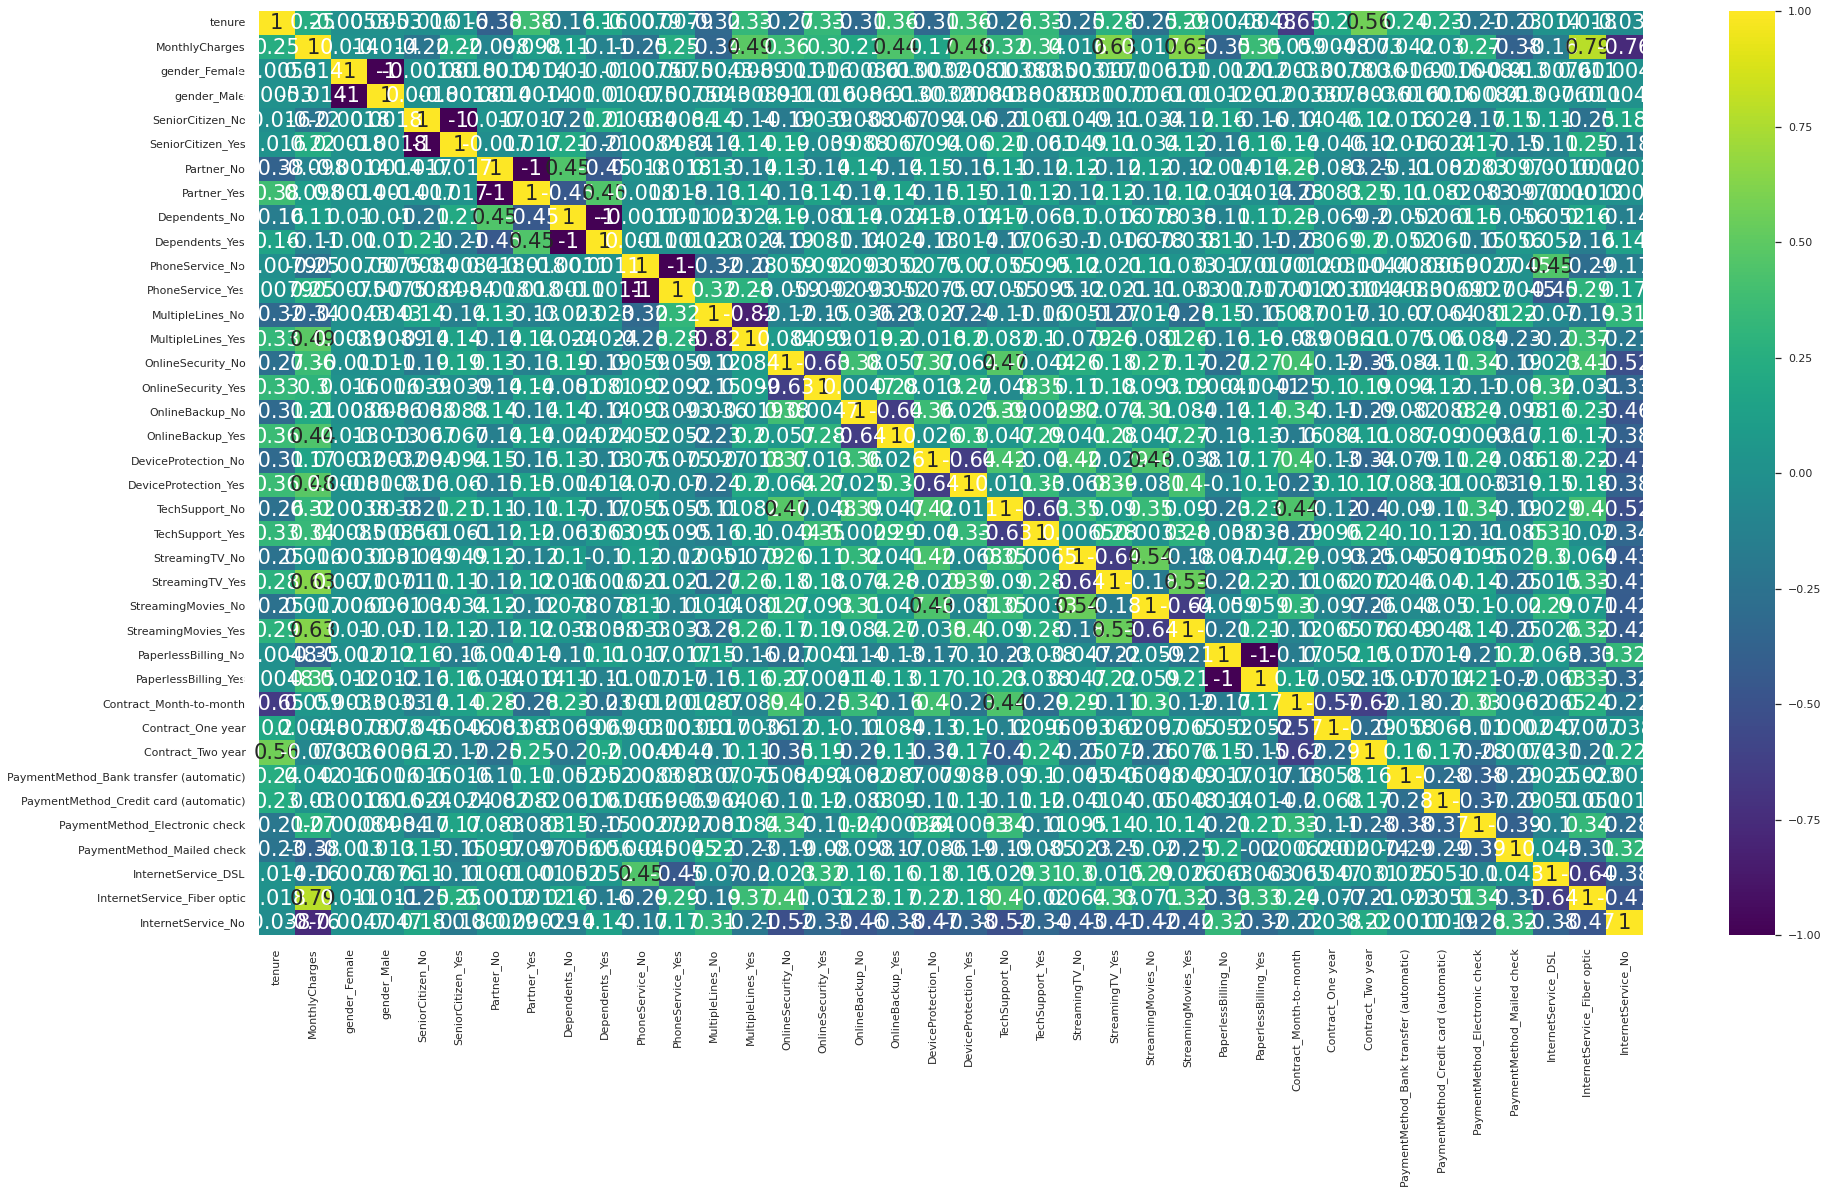

In [70]:
sns.set(rc={'figure.figsize':(31,17) })
correlation = df_enc.corr()
sns.heatmap(correlation, cmap = 'viridis', annot = True, annot_kws={'size':21})

**Answer for Q1**: The most correlated attributes to customer churn are Tenure, Monthly Charges, and Paperless Billing.

**Q2: Which payment method has the highest churn rate?**

**Visualization**

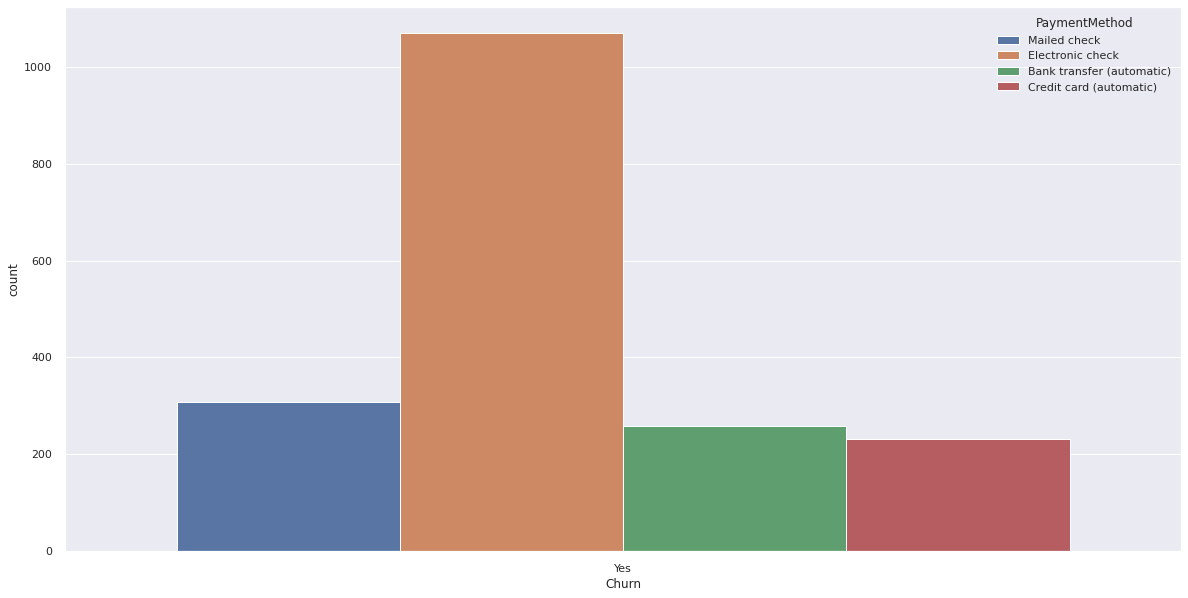

In [29]:
churned = df[df['Churn'] == 'Yes']
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data=churned, x='Churn', hue = churned['PaymentMethod'])

**Answer for Q2**: Electronic Check is the payment method with the highest churn rate.

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

**Answer for Q3**: Your answer here

## Data Preparation for Modelling

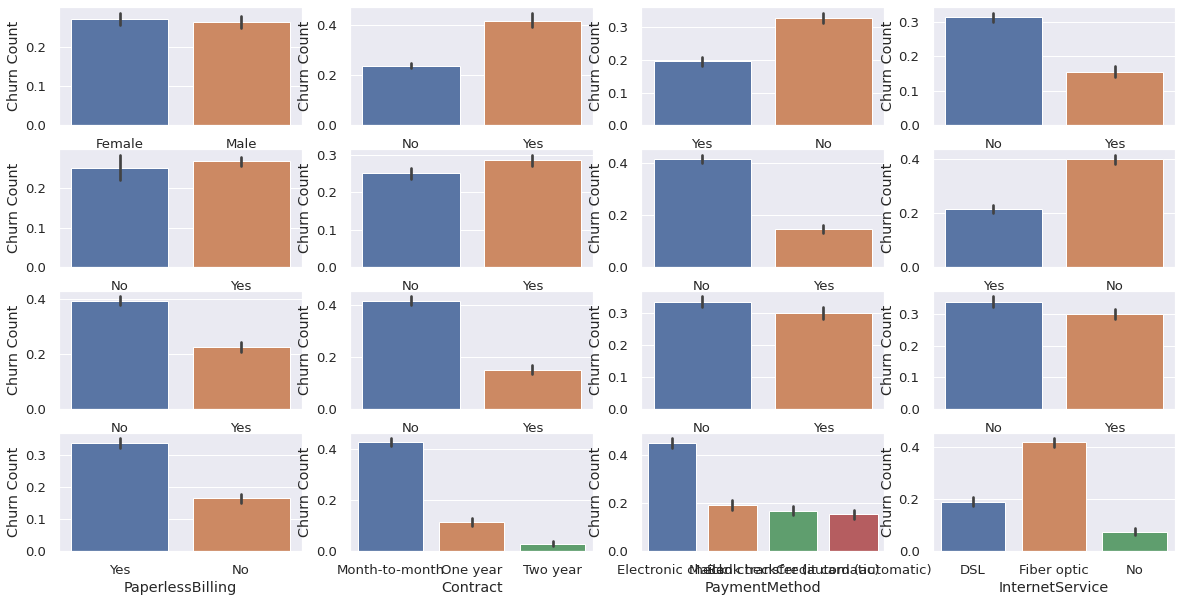

In [62]:
# Checking to see if classes are balanced
df['Churn'].value_counts()
df['Churn'].value_counts() / df['Churn'].count()

# Visulazing the distibution of the data for every feature
df_enc.hist(figsize=(20, 20));

# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

categorical_columns = ['gender', 'SeniorCitizen', 'Partner','Dependents', 'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies','PaperlessBilling', 'Contract', 'PaymentMethod', 'InternetService']
categorical_features = categorical_columns.copy()
dftemp = df.copy()
dftemp['Churn'] = dftemp['Churn'].astype('category').cat.codes


for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    g = sns.barplot(x=column, y='Churn', data=dftemp)
    g.set_xticklabels(g.get_xticklabels(), rotation=0)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

    df_enc.head()

from sklearn.model_selection import train_test_split

X = df_enc.drop('Churn', axis=1)
y = df_enc['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

In [72]:
from sklearn.model_selection import train_test_split

X = df_enc.drop('Churn', axis=1)
y = df_enc['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [73]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True) 
graph = graphviz.Source(dot_data)
graph

## Evaluation

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)        

Train Result:
Accuracy Score: 99.84%
_______________________________________________
CLASSIFICATION REPORT:
                    No          Yes  accuracy    macro avg  weighted avg
precision     0.998066     0.999232  0.998375     0.998649      0.998376
recall        0.999723     0.994648  0.998375     0.997186      0.998375
f1-score      0.998894     0.996935  0.998375     0.997914      0.998373
support    3614.000000  1308.000000  0.998375  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   7 1301]]

Test Result:
Accuracy Score: 71.47%
_______________________________________________
CLASSIFICATION REPORT:
                    No         Yes  accuracy    macro avg  weighted avg
precision     0.812541    0.465546  0.714692     0.639044      0.720283
recall        0.794706    0.493761  0.714692     0.644234      0.714692
f1-score      0.803525    0.479239  0.714692     0.641382      0.717305
support    1549.000000  561.000000  

## Bonus (Optional)